In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [42]:
class Brownian:
    def __init__(self, n, c, N=10):
        self.n = n # number of particles
        self.c = c # initial proportion of particles

        self.N = N # number of time steps

        # Place particles at even intervals along the axis and
        # fill the rest with NaNs to avoid plotting values that
        # haven't been calculated
        self.x = np.ma.zeros((N, n))
        self.x[0] = np.linspace(0, 1, n)
        self.x[1:, :] = np.nan

        # Randomly assign a number of particle and anti-particle
        # states, according to the initial concentration
        n_p = int(n*(1 - c))
        n_a = n - n_p
        self.particles = np.concatenate((-1*np.ones(n_p), np.ones(n_a)))
        np.random.shuffle(self.particles)

        self.compute()

    def compute(self):
        N, n = self.N, self.n
        x, particles = self.x, self.particles
        dx = 1/(self.n - 1)

        self.annihilated = annihilated = np.zeros(n)
        self.wrapped = np.zeros((N, n))

        for t in range(N-1):
            # Bounds checking: wrap particles around [0, L]
            # if x[t, i] > L or x[t, i] < 0:
            #     x[t, i] %= L
            #     self.wrapped[t, i] = 1

            arr = np.random.choice([-dx, dx], size=n)
            x[t + 1] = x[t] + arr
        
    def plot(self):
        N = self.N

        # Plot the trajectories of all particles
        for i, p in enumerate(self.particles):
            plt.plot(range(N), self.x[:, i], color = 'b' if p == 1 else 'r')

        plt.xticks(range(N))
        plt.show()

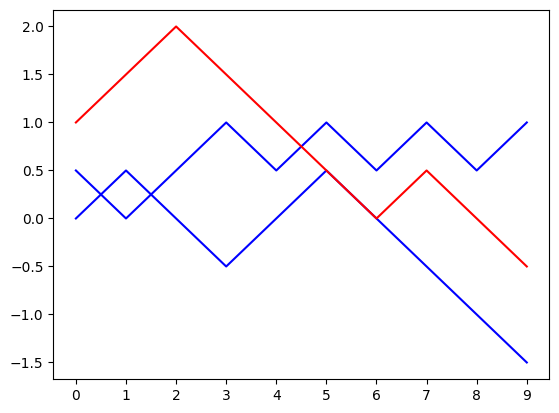

In [43]:
b = Brownian(3, 0.5)
b.plot()